In [95]:
import pandas as pd
import numpy as np

In [96]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [97]:
import warnings
warnings.filterwarnings('ignore')
import pyforest
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

In [98]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [83]:
df.shape

(600, 6)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [85]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [87]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [88]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
#Viewing buttom 10 observations
df.tail(10)


,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


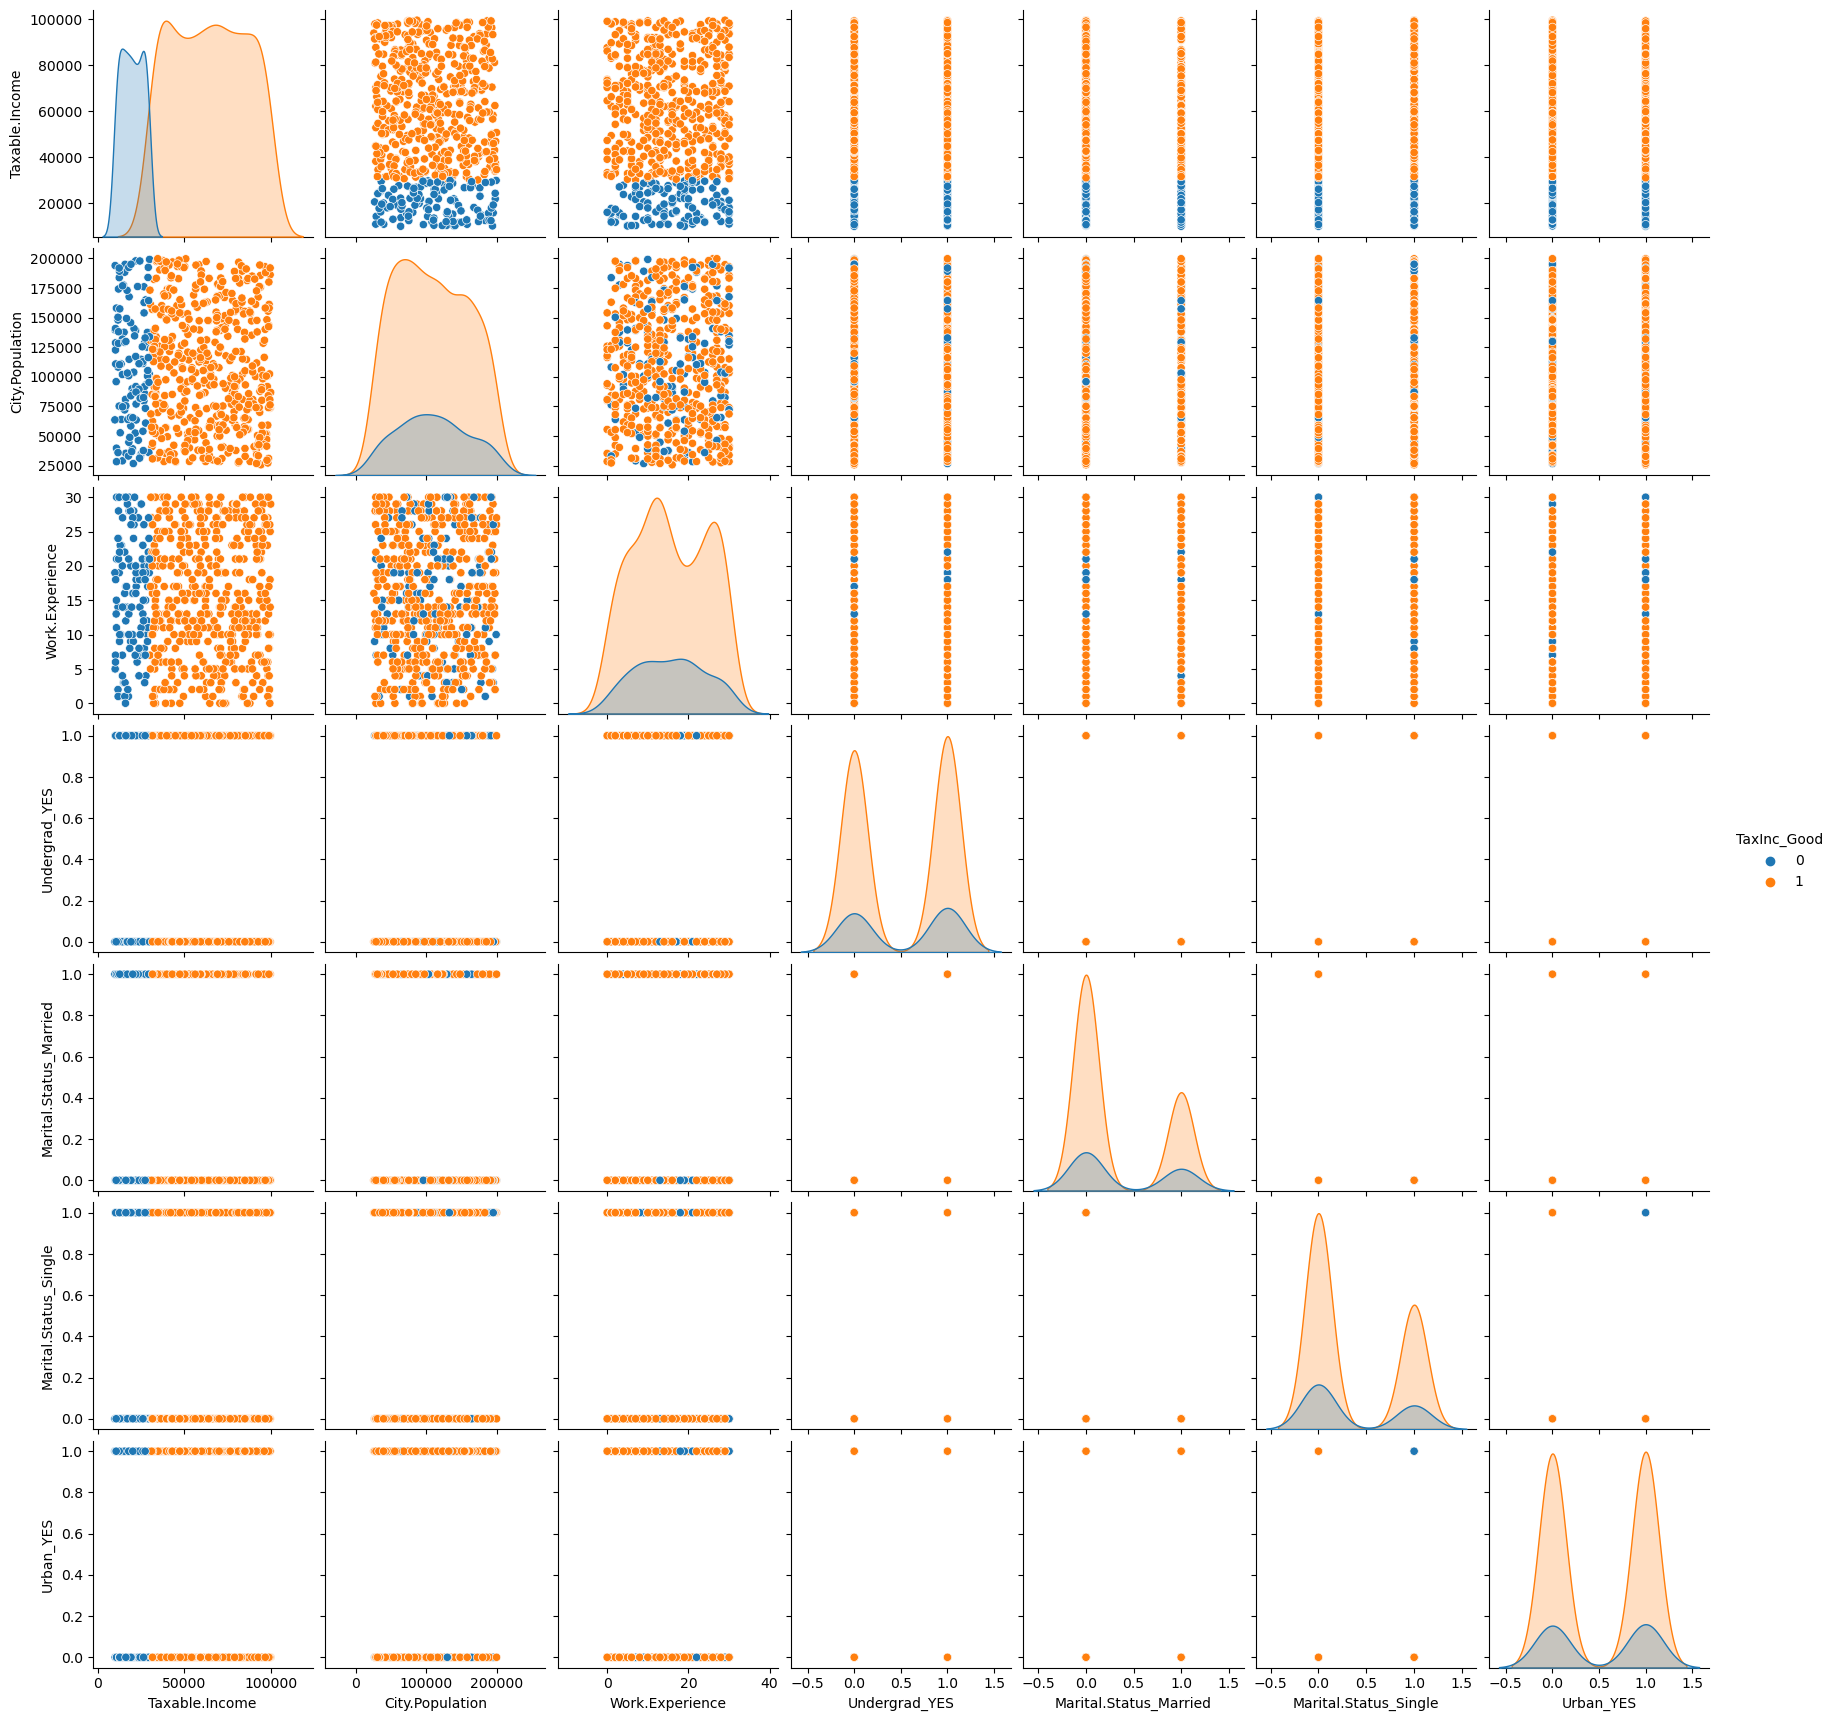

In [89]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

Taxable.Income


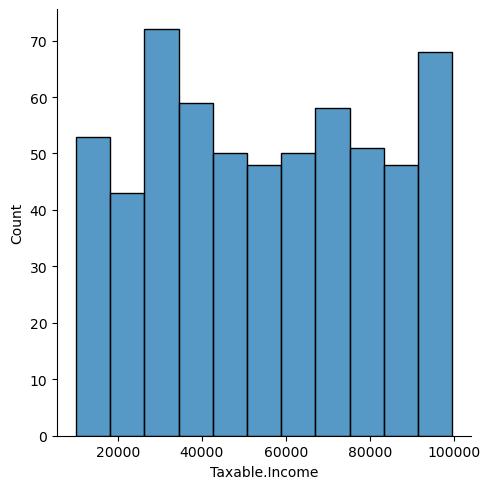

<Figure size 2000x700 with 0 Axes>

City.Population


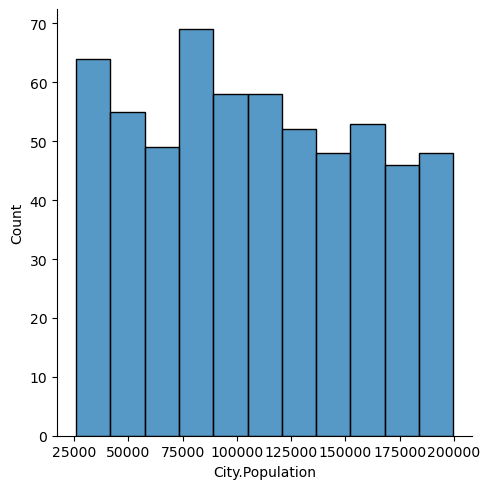

<Figure size 2000x700 with 0 Axes>

Work.Experience


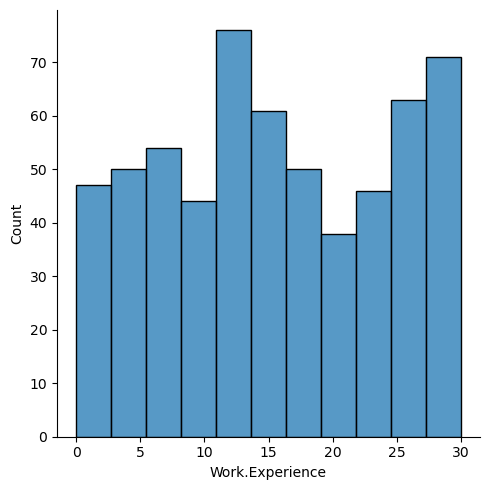

<Figure size 2000x700 with 0 Axes>

Undergrad_YES


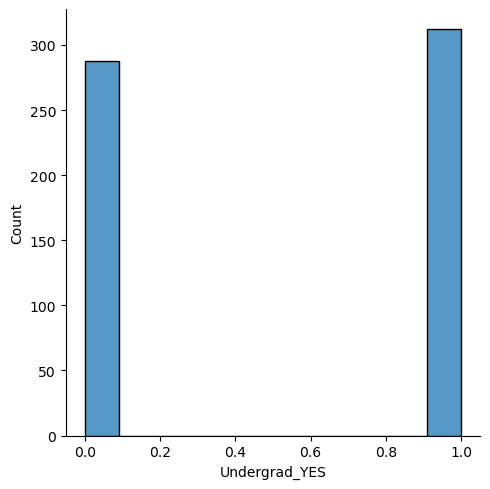

<Figure size 2000x700 with 0 Axes>

Marital.Status_Married


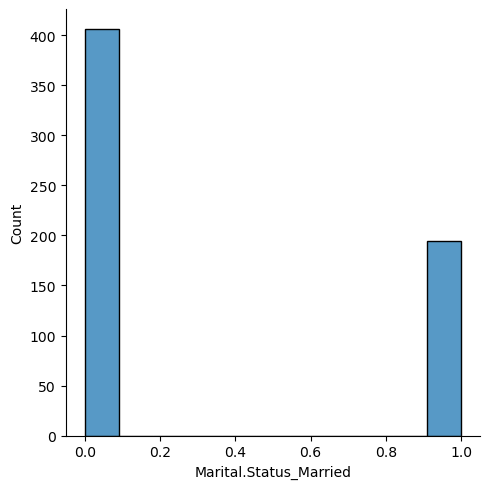

<Figure size 2000x700 with 0 Axes>

Marital.Status_Single


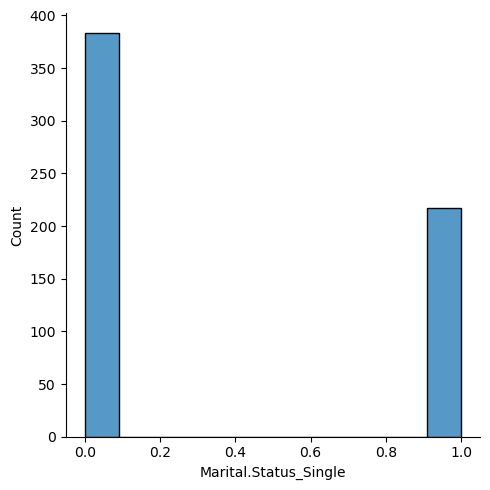

<Figure size 2000x700 with 0 Axes>

Urban_YES


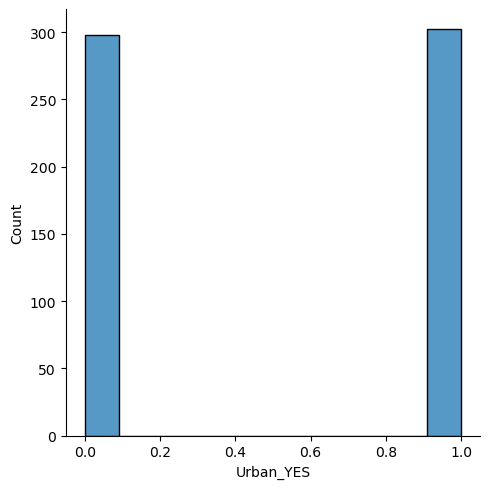

<Figure size 2000x700 with 0 Axes>

TaxInc_Good


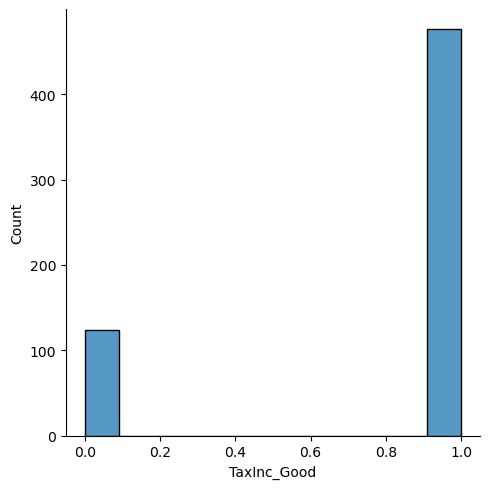

<Figure size 2000x700 with 0 Axes>

In [91]:
for n in df.columns:
    print(n)
    sn.displot(df[n])
    plt.figure(figsize=(20,7))
    plt.show()

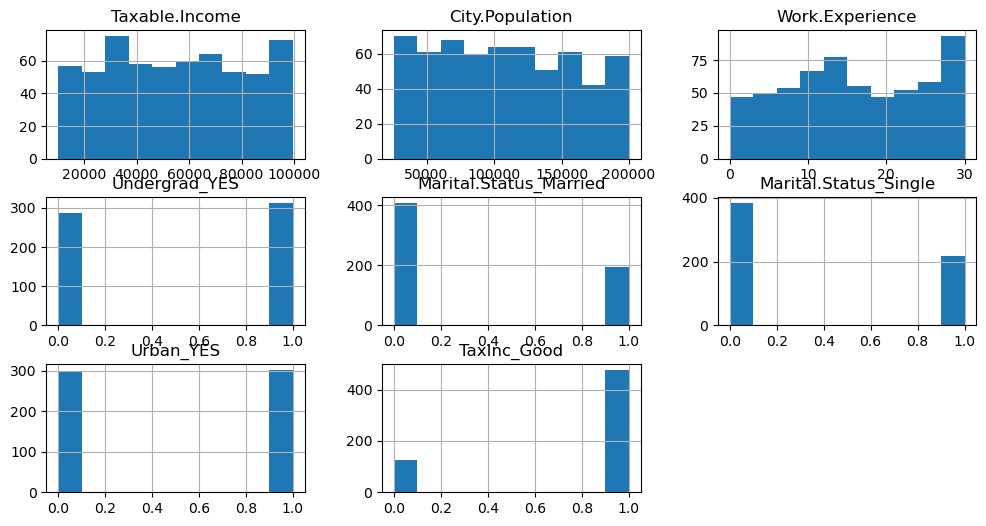

In [94]:
df.hist(figsize=(12,6))
plt.show();

In [99]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x:0 if x<30000 else 1)

In [100]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [101]:
df['Marital.Status']=df['Marital.Status'].replace(['Single','Divorced','Married'],[0,2,1])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,0,1,50047,10,YES
1,YES,2,1,134075,18,YES
2,NO,1,1,160205,30,YES
3,YES,0,1,193264,15,YES
4,NO,1,1,27533,28,NO


In [102]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [103]:
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,YES
1,1,2,1,134075,18,YES
2,0,1,1,160205,30,YES
3,1,0,1,193264,15,YES
4,0,1,1,27533,28,NO


In [104]:
df['Urban']=df['Urban'].replace(['YES','NO'],[1,0])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,2,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0


In [105]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [106]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [107]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'])


In [108]:
df.head()

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0


In [109]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1


In [110]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int64

In [111]:
Y=pd.DataFrame(Y)
Y

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [112]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((480, 5), (480, 1), (120, 5), (120, 1))

In [113]:
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}

In [115]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

skfolds=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=skfolds)
print(results.mean())

0.7354166666666666


In [69]:
grid=GridSearchCV(model,parameters,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [118]:
grid.best_score_

0.7708333333333333

In [119]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 2}

In [120]:
final_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=4,max_depth= 4,
 max_features=4,random_state=12)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_split=4, random_state=12)

In [121]:
y_test_pred=final_model.predict(x_test)
y_test

,Taxable.Income
149,1
180,1
427,1
109,1
279,1
...,...
257,1
260,1
154,0
464,1


In [74]:
score=cross_val_score(final_model,x_train,y_train,cv=10)
score.mean()

0.76875

In [76]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.05      0.09        20
           1       0.84      0.99      0.91       100

    accuracy                           0.83       120
   macro avg       0.67      0.52      0.50       120
weighted avg       0.78      0.83      0.77       120



In [77]:
df.columns

Index(['Taxable.Income', 'Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

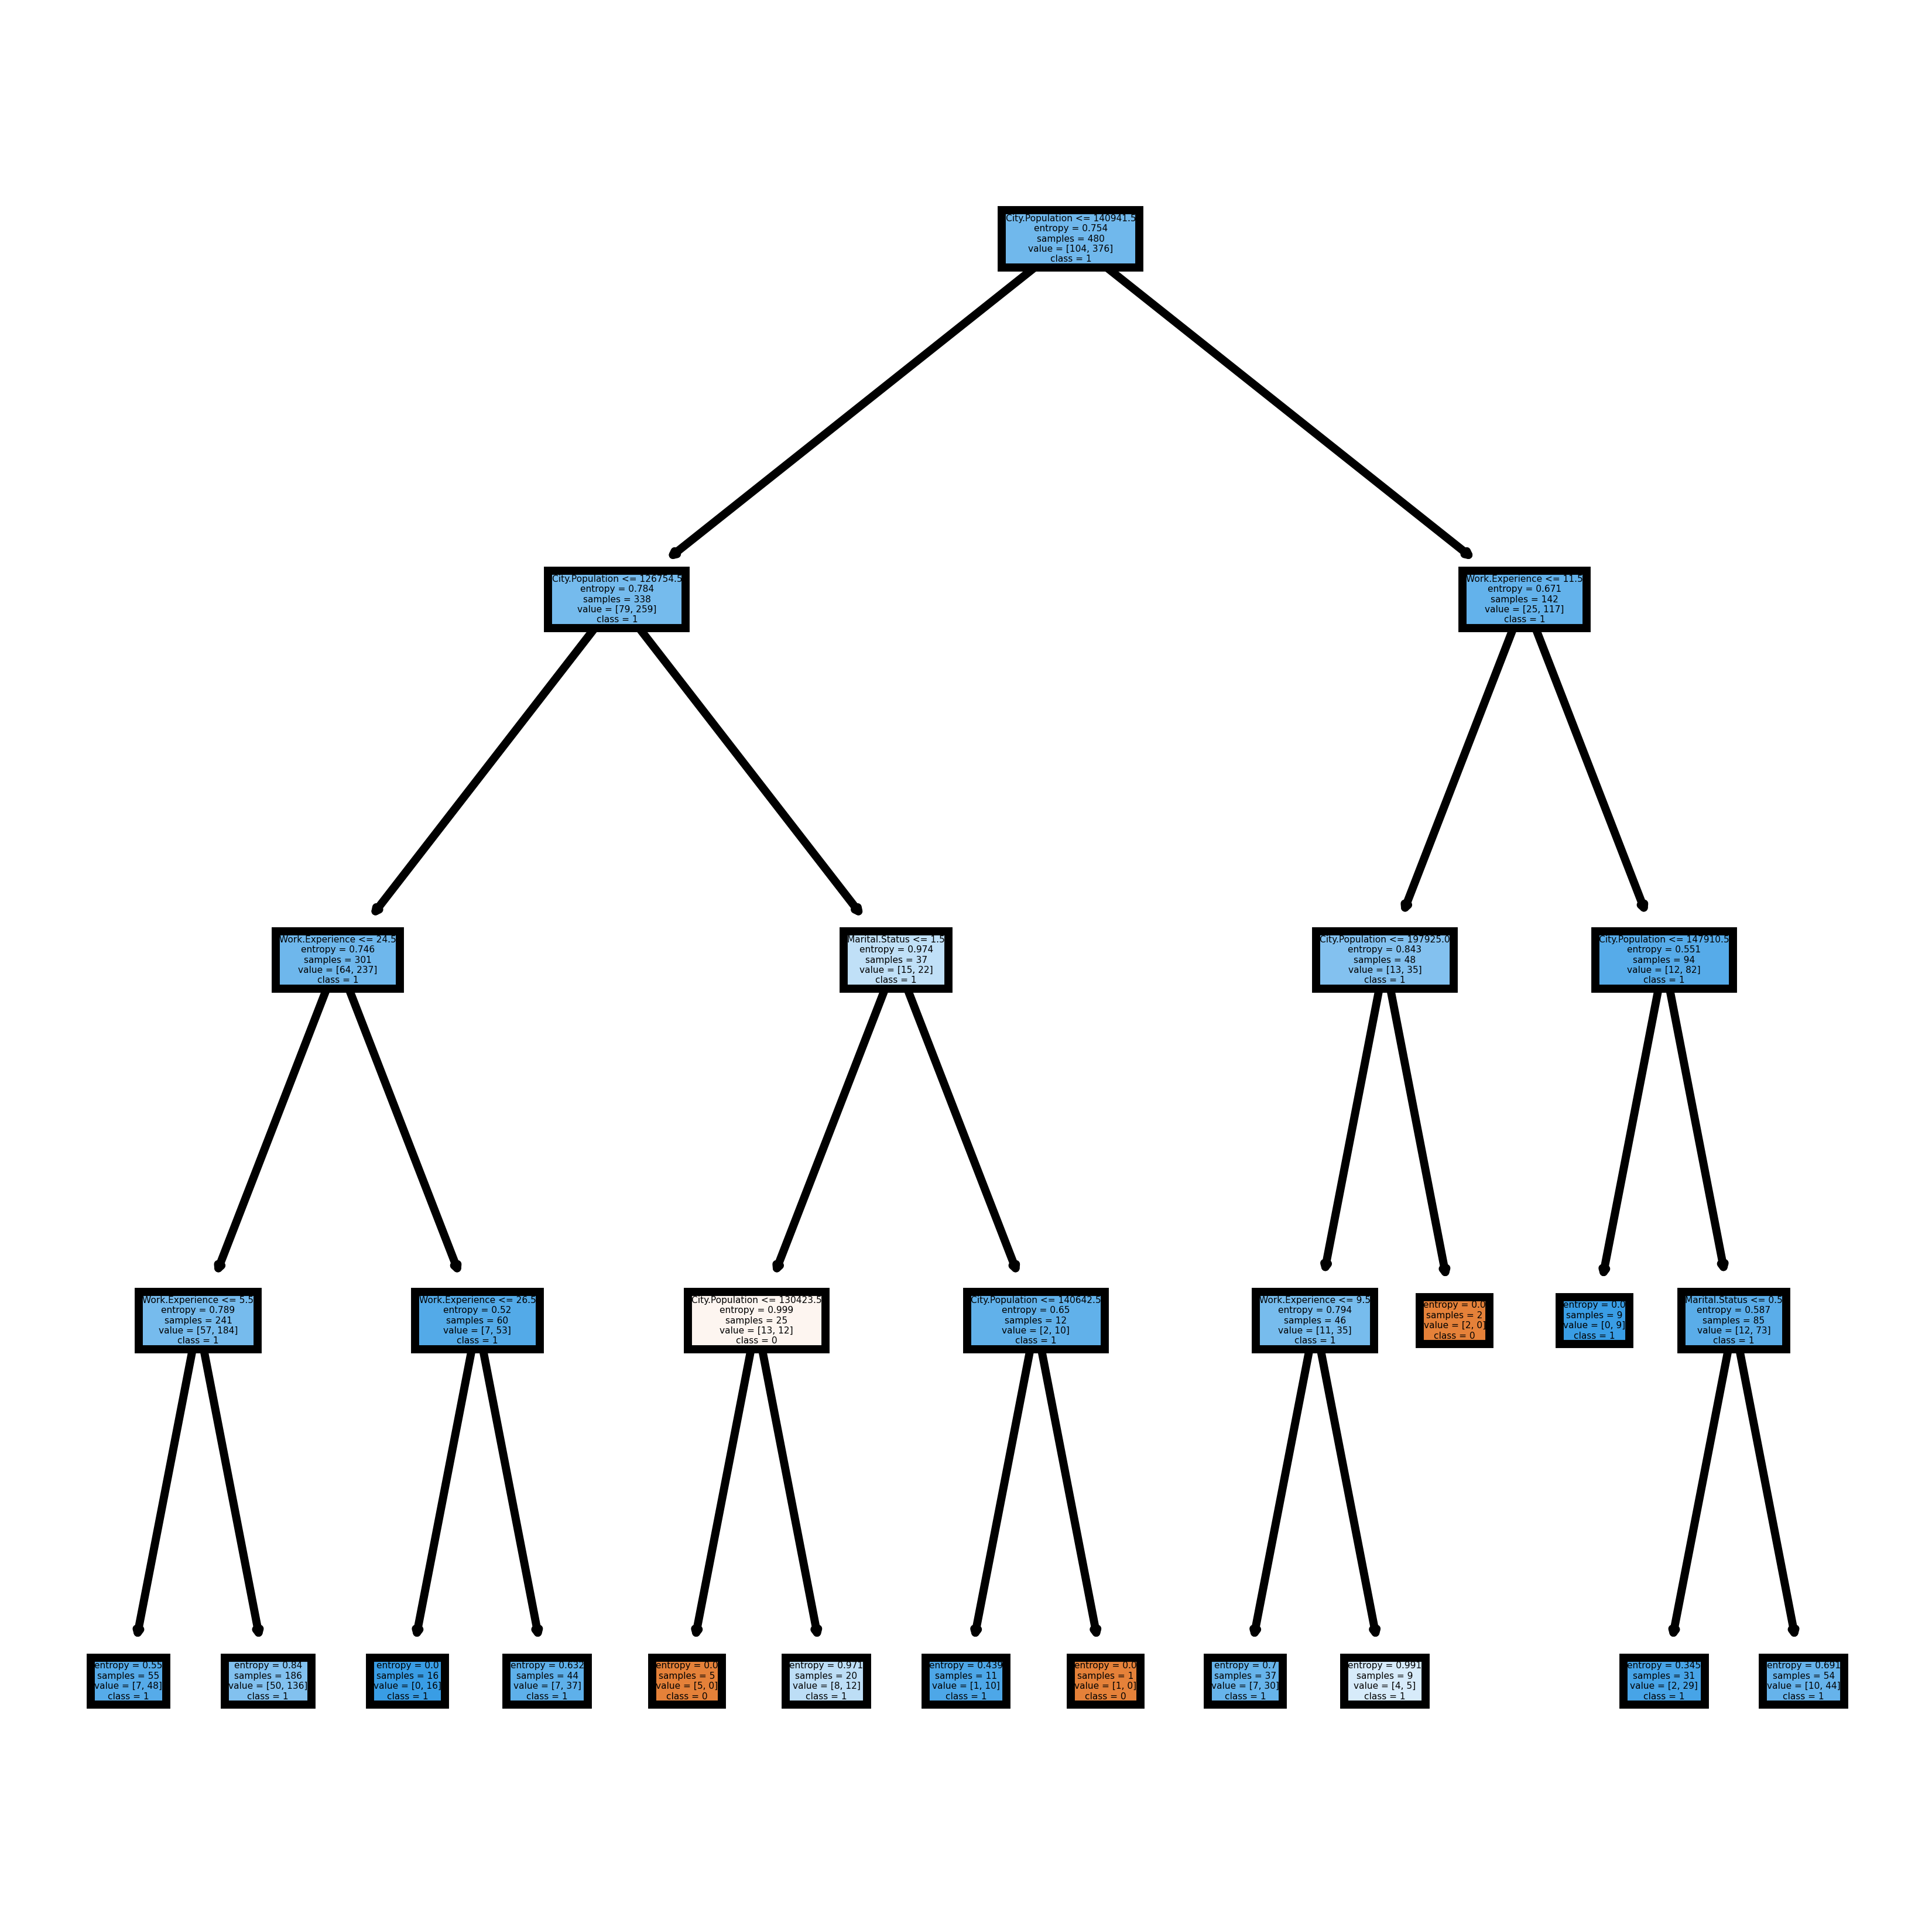

In [78]:
fn=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
cn=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(final_model,feature_names=fn,class_names=cn,filled=True)
plt.show()